In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from helpers.collection_of_experiments import CollectionOfExperiments
from helpers.computational_tools import remesh, select_LatLon, L1_error, x_coord, y_coord
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")

# Read all experiments in the folder. Concatenete collections with "+" operator, which concatenate dictionary of experiments.

In [23]:
ds = CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Feb2022/bare', additional_subfolder='output')# +\
     #CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4', additional_subfolder='output')

In [30]:
ds.remesh('R64', 'R2')
ds.remesh('R64', 'R4')
ds.remesh('R64', 'R8')
ds.remesh('R64', 'R16')
ds.remesh('R64', 'R32')

Experiment R64 coarsegrained to R2 is created. Its identificator=R64_R2
Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4
Experiment R64 coarsegrained to R8 is created. Its identificator=R64_R8
Experiment R64 coarsegrained to R16 is created. Its identificator=R64_R16
Experiment R64 coarsegrained to R32 is created. Its identificator=R64_R32


In [25]:
exps = ['R64_R2', 'R64_R4', 'R64_R8', 'R64']
len(ds.exps)

11

# Precompute statistics, which are cached in netcdf files

# Manually delete all cache files and compute them again

In [31]:
%%time
ds.compute_statistics(recompute=False)

CPU times: user 7min 1s, sys: 8min 48s, total: 15min 50s
Wall time: 5min 18s


# Check that all cache files exist

In [32]:
%%time
ds.compute_statistics(recompute=False)

CPU times: user 1.43 s, sys: 162 ms, total: 1.59 s
Wall time: 4.93 s


# Access to cached on disk properties

In [28]:
%time ds['R64'].KE_spectrum_global

CPU times: user 4.46 ms, sys: 0 ns, total: 4.46 ms
Wall time: 4.11 ms


<xarray.DataArray 'KE_spectrum_global' (zl: 2, freq_r: 387)>
dask.array<open_dataset-c0be8fa8f5d76578f1057fe98ebca69aKE_spectrum_global, shape=(2, 387), dtype=float64, chunksize=(1, 387), chunktype=numpy.ndarray>
Coordinates:
  * zl       (zl) float64 1.035e+03 1.036e+03
  * freq_r   (freq_r) float64 3.328e-06 7.671e-06 ... 0.001795 0.001799

# Basic snapshots plotting

CPU times: user 631 ms, sys: 149 ms, total: 780 ms
Wall time: 930 ms


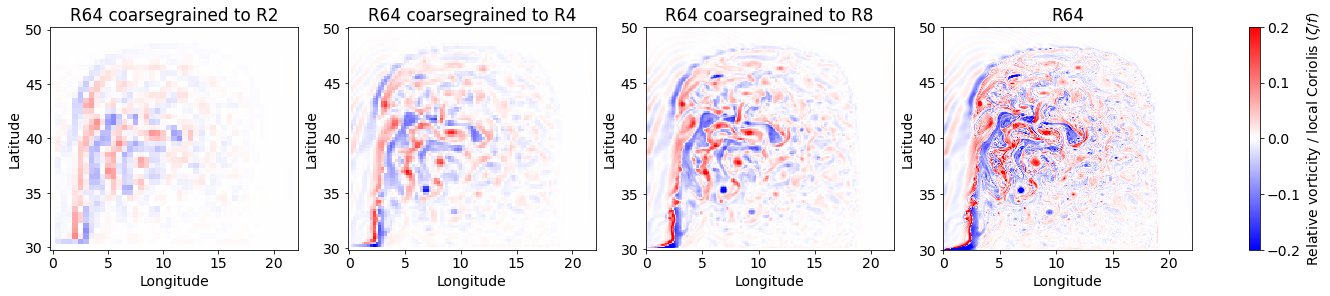

In [33]:
%%time
fig, ax = ds.get_axes(nfig=4,ncol=4)
ds.plot_RV(exps,ax=ax);

CPU times: user 751 ms, sys: 82.7 ms, total: 833 ms
Wall time: 872 ms


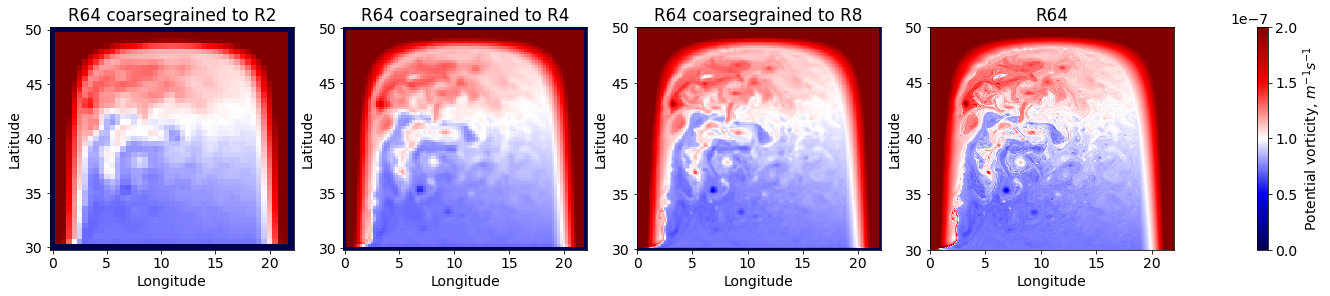

In [34]:
%%time
fig, ax = ds.get_axes(nfig=4,ncol=4)
ds.plot_PV(exps,ax=ax);

CPU times: user 276 ms, sys: 16.7 ms, total: 293 ms
Wall time: 427 ms


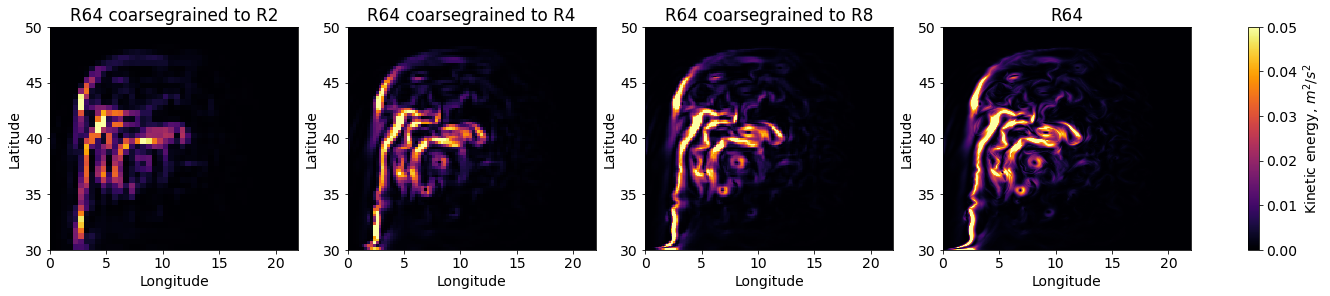

In [35]:
%%time
fig, ax = ds.get_axes(nfig=4,ncol=4)
ds.plot_KE(exps,ax=ax);

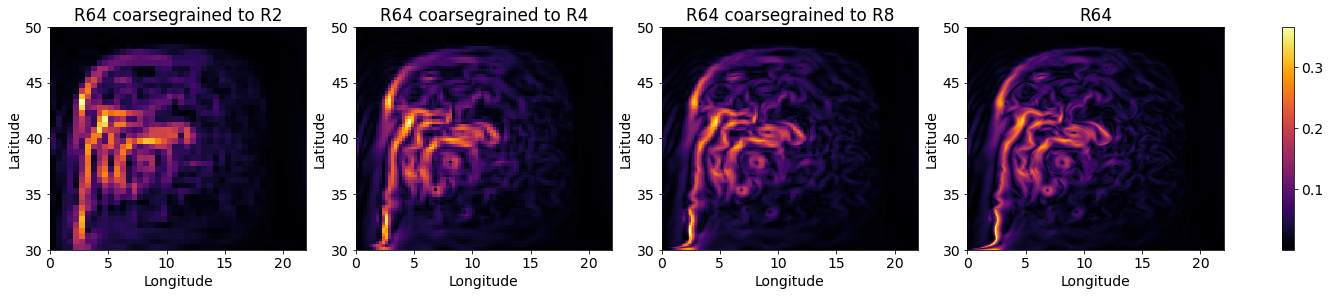

In [47]:
fig, ax = ds.get_axes(nfig=4,ncol=4)
for exp in ds.exps:
    ds[exp].velocity = np.sqrt(2*ds[exp].KE)
ds.pcolormesh('velocity', exps, cmap='inferno', ax=ax)

# Building of movies

In [99]:
%%time
animate_function = ds.animate(ds.plot_PV, nfig=4, ncol=4, videoname='PV.mp4')
animate_function(exps);

CPU times: user 23.6 s, sys: 308 ms, total: 23.9 s
Wall time: 24.3 s


'PV.mp4'

In [100]:
%%time
animate_function = ds.animate(ds.plot_KE, nfig=4, ncol=4, videoname='KE.mp4')
animate_function(exps);

CPU times: user 30.3 s, sys: 609 ms, total: 30.9 s
Wall time: 29.1 s


'KE.mp4'

# Build custom figure layout with "get_axes"

Reading file /home/pp2681/ocean-tools/cache/KE_R64_R2.nc
Returning cached value of KE
Reading file /home/pp2681/ocean-tools/cache/KE_R64_R4.nc
Returning cached value of KE
Reading file /home/pp2681/ocean-tools/cache/KE_R64_R8.nc
Returning cached value of KE
CPU times: user 1.03 s, sys: 21.3 ms, total: 1.05 s
Wall time: 1.03 s


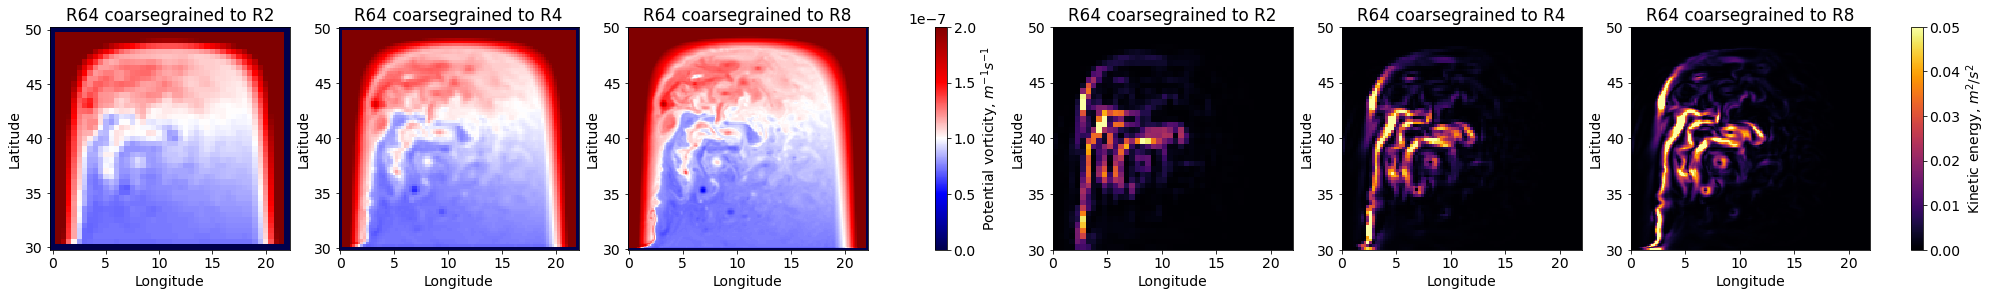

In [273]:
%%time
fig, ax = ds.get_axes(nfig=6, ncol=6)
ds.plot_PV(exps[0:3], ax=ax[:3]);
ds.plot_KE(exps[0:3], ax=ax[3:]);

# Statistical tools. Spectral analysis

Text(0.5, 0.98, 'Total KE spatial spectrum')

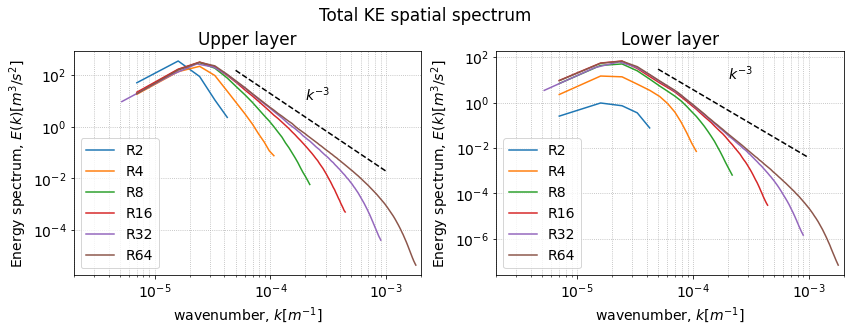

In [48]:
fig, ax = ds.get_axes(nfig=2,ncol=2,ratio=1.3, size=4.5)
ds.plot_KE_spectrum(['R2', 'R4', 'R8', 'R16', 'R32', 'R64'],key='KE_spectrum', ax=ax);
plt.suptitle('Total KE spatial spectrum')

Text(0.5, 0.98, 'EKE spatial spectrum')

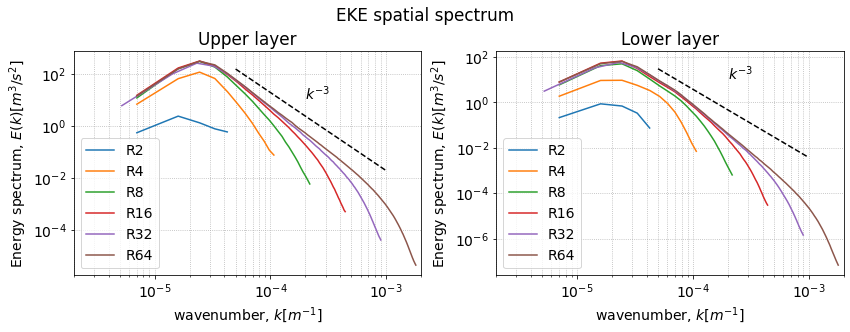

In [49]:
fig, ax = ds.get_axes(nfig=2,ncol=2,ratio=1.3, size=4.5)
ds.plot_KE_spectrum(['R2', 'R4', 'R8', 'R16', 'R32', 'R64'],key='EKE_spectrum', ax=ax);
plt.suptitle('EKE spatial spectrum')

Text(0.5, 0.98, 'MKE spatial spectrum')

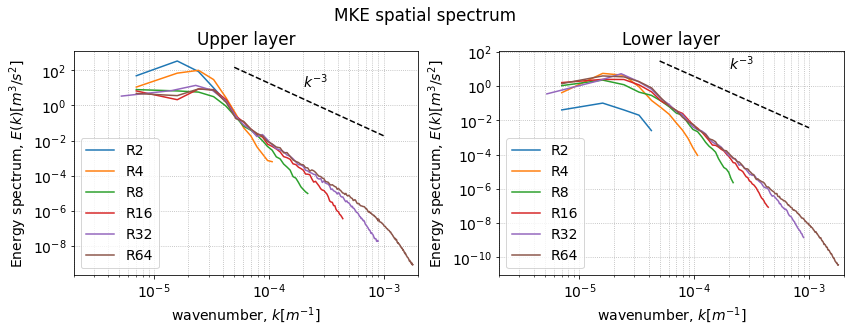

In [50]:
fig, ax = ds.get_axes(nfig=2,ncol=2,ratio=1.3, size=4.5)
ds.plot_KE_spectrum(['R2', 'R4', 'R8', 'R16', 'R32', 'R64'],key='MKE_spectrum', ax=ax);
plt.suptitle('MKE spatial spectrum')

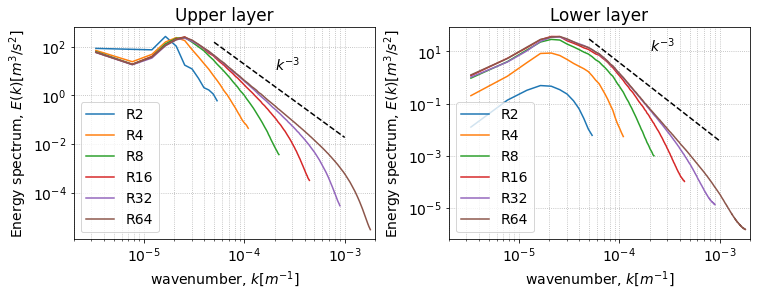

In [51]:
fig, ax = ds.get_axes(nfig=2,ncol=2,ratio=1.3)
ds.plot_KE_spectrum(['R2', 'R4', 'R8', 'R16', 'R32', 'R64'],key='KE_spectrum_global', ax=ax);

Text(0.5, 0.98, 'total KE spatial spectrum')

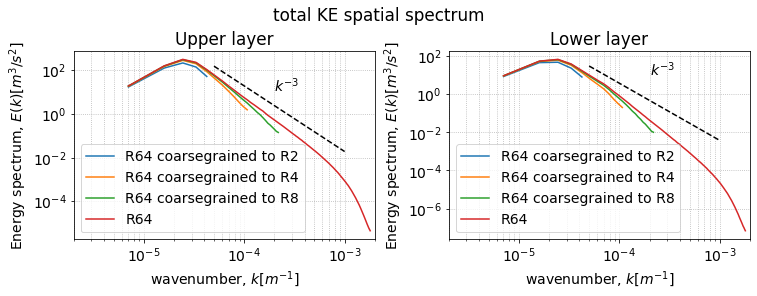

In [52]:
fig, ax = ds.get_axes(nfig=2,ncol=2,ratio=1.3)
ds.plot_KE_spectrum(['R64_R2', 'R64_R4', 'R64_R8', 'R64'],key='KE_spectrum', ax=ax);
plt.suptitle('total KE spatial spectrum')

Text(0.5, 0.98, 'EKE spatial spectrum')

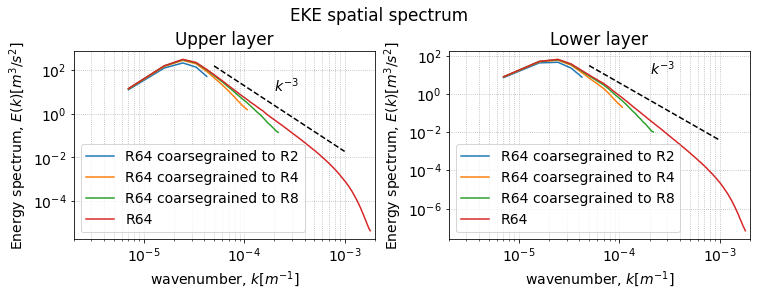

In [53]:
fig, ax = ds.get_axes(nfig=2,ncol=2,ratio=1.3)
ds.plot_KE_spectrum(['R64_R2', 'R64_R4', 'R64_R8', 'R64'],key='EKE_spectrum', ax=ax);
plt.suptitle('EKE spatial spectrum')

Reading file /home/pp2681/ocean-tools/cache/MKE_spectrum_R64_R2.nc
Returning cached value of MKE_spectrum
Reading file /home/pp2681/ocean-tools/cache/MKE_spectrum_R64_R4.nc
Returning cached value of MKE_spectrum
Reading file /home/pp2681/ocean-tools/cache/MKE_spectrum_R64_R8.nc
Returning cached value of MKE_spectrum
Reading file /home/pp2681/ocean-tools/cache/MKE_spectrum_R64.nc
Returning cached value of MKE_spectrum


Text(0.5, 0.98, 'MKE spatial spectrum')

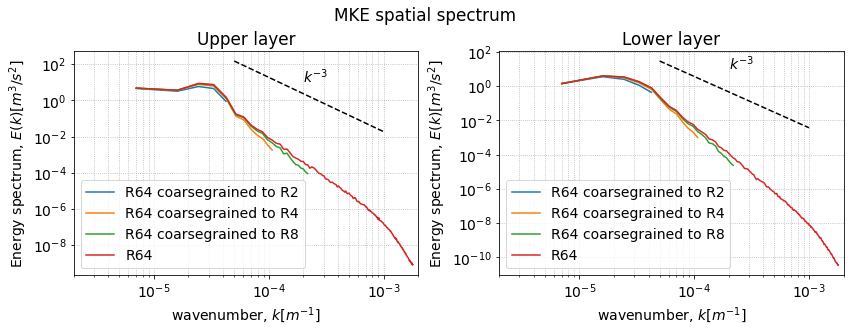

In [189]:
fig, ax = ds.get_axes(nfig=2,ncol=2,ratio=1.3, size=4.5)
ds.plot_KE_spectrum(['R64_R2', 'R64_R4', 'R64_R8', 'R64'],key='MKE_spectrum', ax=ax);
plt.suptitle('MKE spatial spectrum')

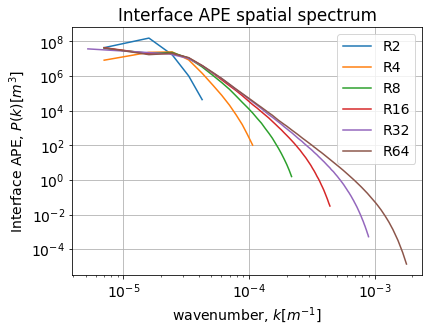

In [54]:
fig, ax = ds.get_axes(nfig=1,ncol=1,ratio=1.3, size=4.5)
for exp in ['R2', 'R4', 'R8', 'R16', 'R32', 'R64']:
    ds[exp].PE_spectrum.plot(label=exp)
ax[0].set_title('Interface APE spatial spectrum')
plt.xlabel('wavenumber, $k[m^{-1}]$')
plt.ylabel('Interface APE, $P(k)[m^3]$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid()

# Spectral time analysis

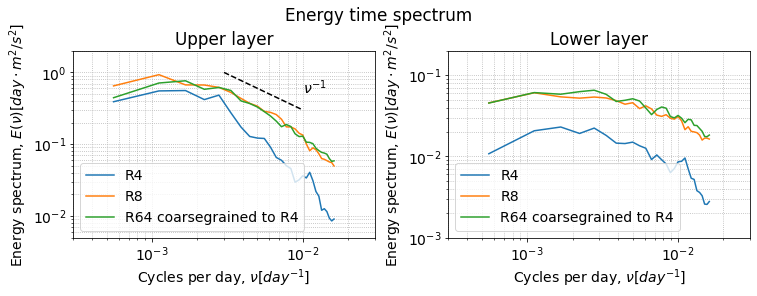

In [236]:
fig, ax = ds.get_axes(nfig=2,ncol=2,ratio=1.3)
ds.plot_KE_time_spectrum(['R4', 'R8', 'R64_R4'],  ax=ax);
plt.suptitle('Energy time spectrum')
plt.savefig('time-spectrum.pdf', bbox='tight', pad_inches=0.1)

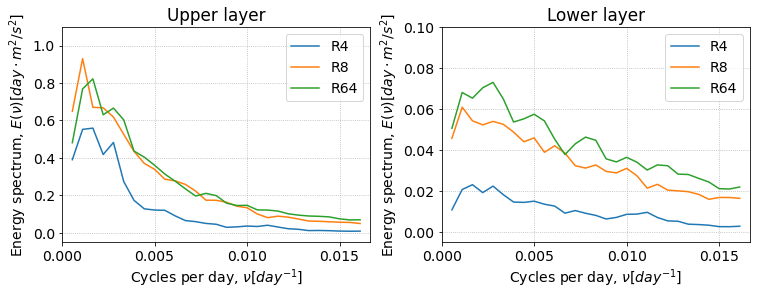

In [56]:
fig, ax = ds.get_axes(nfig=2,ncol=2,ratio=1.3, size=4)
ds.plot_KE_time_spectrum(['R4', 'R8', 'R64'], ax=ax, log=False);

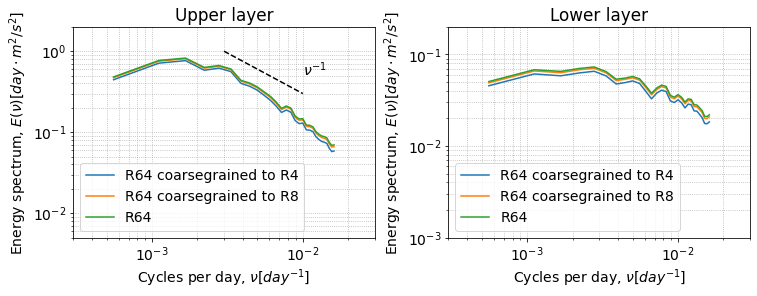

In [57]:
fig, ax = ds.get_axes(nfig=2,ncol=2,ratio=1.3)
ds.plot_KE_time_spectrum(['R64_R4', 'R64_R8', 'R64'], ax=ax);

# Simple diagnostics

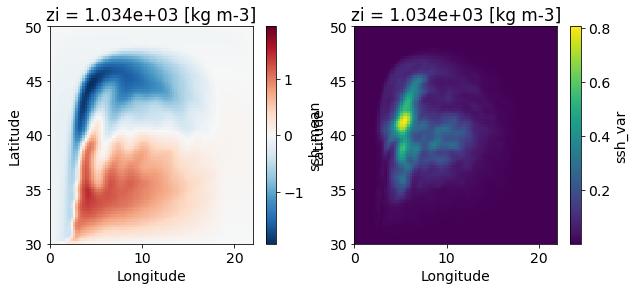

In [58]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
ds['R64_R4'].ssh_mean.plot(ax=ax[0])
ds['R64_R4'].ssh_var.plot(ax=ax[1])

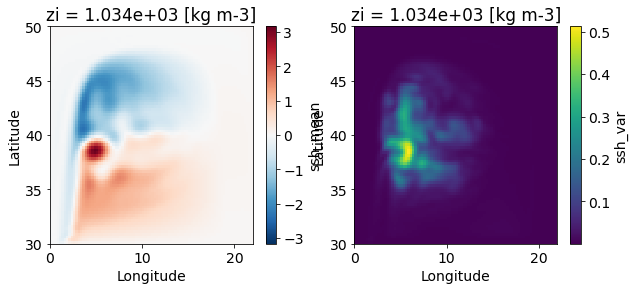

In [59]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
ds['R4'].ssh_mean.plot(ax=ax[0])
ds['R4'].ssh_var.plot(ax=ax[1])

Text(0.5, 0.98, 'Low-resolution simulation')

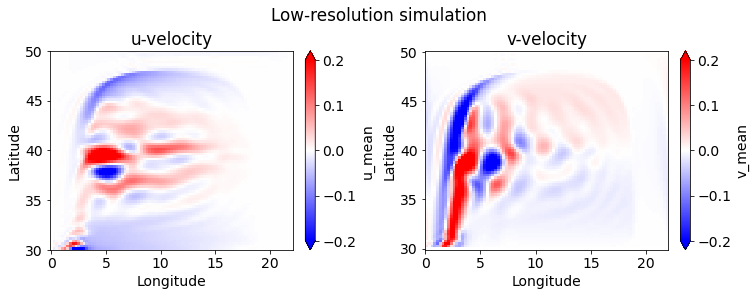

In [60]:
fig, ax = ds.get_axes(nfig=2,ncol=2, ratio=1.3)
ds['R4'].u_mean.isel(zl=0).plot(ax=ax[0],vmin=-0.2, vmax=0.2, cmap='bwr')
ax[0].set_title('u-velocity')
ds['R4'].v_mean.isel(zl=0).plot(ax=ax[1],vmin=-0.2, vmax=0.2, cmap='bwr')
ax[1].set_title('v-velocity')
plt.suptitle('Low-resolution simulation')

Text(0.5, 0.98, 'Hi-resolution simulation')

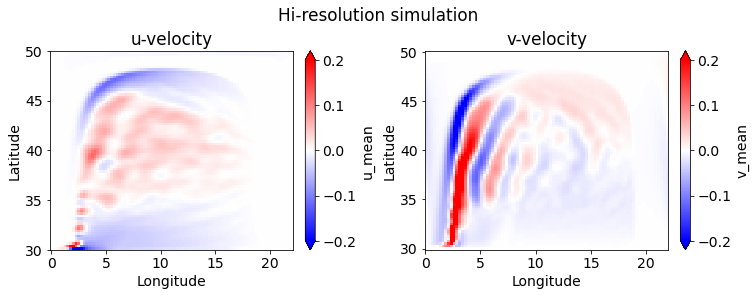

In [61]:
fig, ax = ds.get_axes(nfig=2,ncol=2, ratio=1.3)
ds['R64_R4'].u_mean.isel(zl=0).plot(ax=ax[0],vmin=-0.2, vmax=0.2, cmap='bwr')
ax[0].set_title('u-velocity')
ds['R64_R4'].v_mean.isel(zl=0).plot(ax=ax[1],vmin=-0.2, vmax=0.2, cmap='bwr')
ax[1].set_title('v-velocity')
plt.suptitle('Hi-resolution simulation')

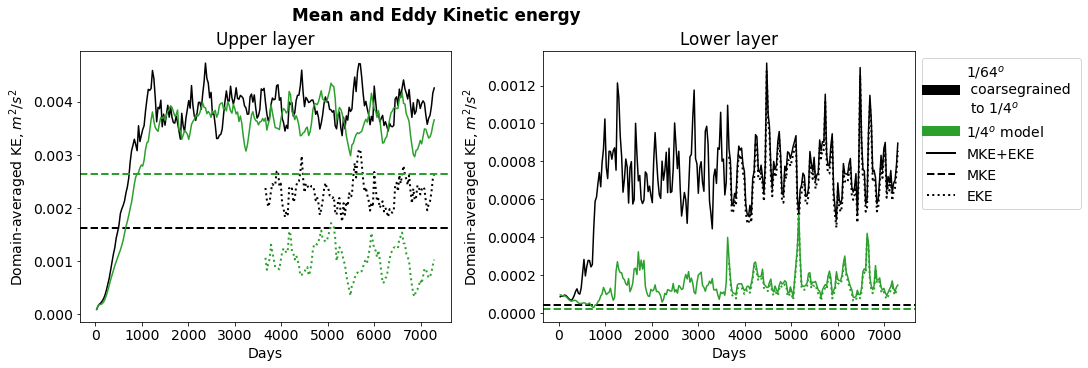

In [237]:
fig, axs = ds.get_axes(nfig=2,ncol=2, ratio=1.5, size=5)
for zl in [0,1]:
    color = ['k', 'tab:green']
    title = ['Upper', 'Lower']
    exp = ['R64_R4', 'R4']
    for j in [0,1]:
        ax = axs[zl]
        ds[exp[j]].KE_series.isel(zl=zl).plot(ax=ax, color=color[j])
        ds[exp[j]].EKE_series.isel(zl=zl).plot(ax=ax, color=color[j], ls=':', lw=2)
        ax.axhline(y=ds[exp[j]].MKE_val.isel(zl=zl), ls='--', lw=2, color=color[j])
        ax.set_title(f'{title[zl]} layer')
        ax.set_xlabel('Days')
        ax.set_ylabel('Domain-averaged KE, $m^2/s^2$')
plt.plot(np.nan,np.nan,'k-',lw=10,label='$1/64^o$ \n coarsegrained \n to $1/4^o$')
plt.plot(np.nan,np.nan,'tab:green', lw=10, label='$1/4^o$ model')
plt.plot(np.nan,np.nan,'k-', lw=2, label='MKE+EKE')
plt.plot(np.nan,np.nan,'k--', lw=2, label='MKE')
plt.plot(np.nan,np.nan,'k:', lw=2, label='EKE')
plt.legend(bbox_to_anchor=(1,1))
plt.suptitle('Mean and Eddy Kinetic energy', x=0.4, weight='bold')
plt.savefig('MKE-EKE-time-series.pdf', bbox='tight', pad_inches=0.1)

# Mean kinetic energy (MKE), Eddy kinetic energy (EKE) and total

Text(0.5, 0.98, 'Upper layer')

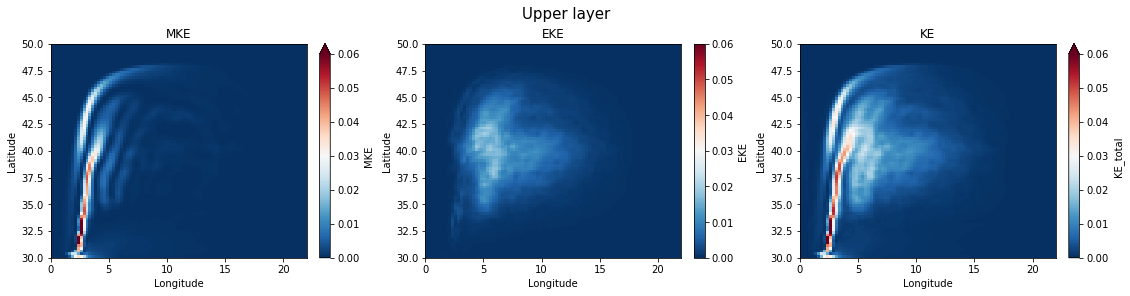

In [26]:
fig, ax = ds.get_axes(nfig=3,ncol=3, ratio=1.3)
ds['R64_R4'].MKE.isel(zl=0).plot(ax=ax[0], vmin=0, vmax=0.06, cmap='RdBu_r')
ax[0].set_title('MKE')
ds['R64_R4'].EKE.isel(zl=0).plot(ax=ax[1], vmin=0, vmax=0.06, cmap='RdBu_r')
ax[1].set_title('EKE')
ds['R64_R4'].KE_total.isel(zl=0).plot(ax=ax[2], vmin=0, vmax=0.06, cmap='RdBu_r')
ax[2].set_title('KE')
plt.suptitle('Upper layer', fontsize=15)

Reading file /home/pp2681/ocean-tools/cache/MKE_R4.nc
Returning cached value of MKE
Reading file /home/pp2681/ocean-tools/cache/EKE_R4.nc
Returning cached value of EKE
Reading file /home/pp2681/ocean-tools/cache/KE_total_R4.nc
Returning cached value of KE_total


Text(0.5, 0.98, 'Lowres model')

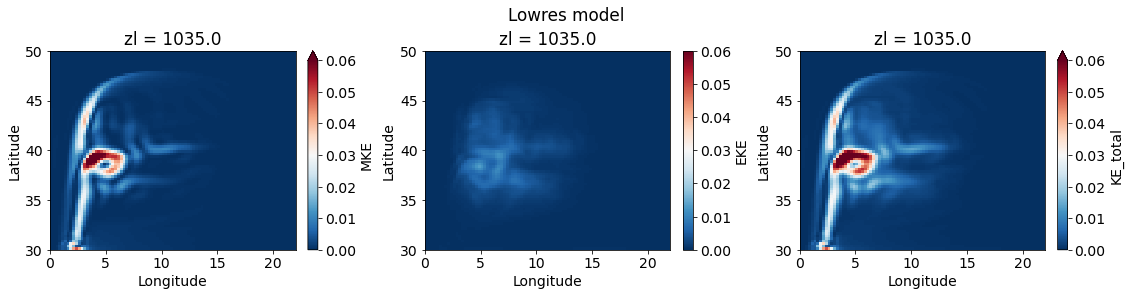

In [212]:
fig, ax = ds.get_axes(nfig=3,ncol=3, ratio=1.3)
ds['R4'].MKE.isel(zl=0).plot(ax=ax[0], vmin=0, vmax=0.06, cmap='RdBu_r')
ds['R4'].EKE.isel(zl=0).plot(ax=ax[1], vmin=0, vmax=0.06, cmap='RdBu_r')
ds['R4'].KE_total.isel(zl=0).plot(ax=ax[2], vmin=0, vmax=0.06, cmap='RdBu_r')
plt.suptitle('Lowres model')

Text(0.5, 0.98, 'Lower layer')

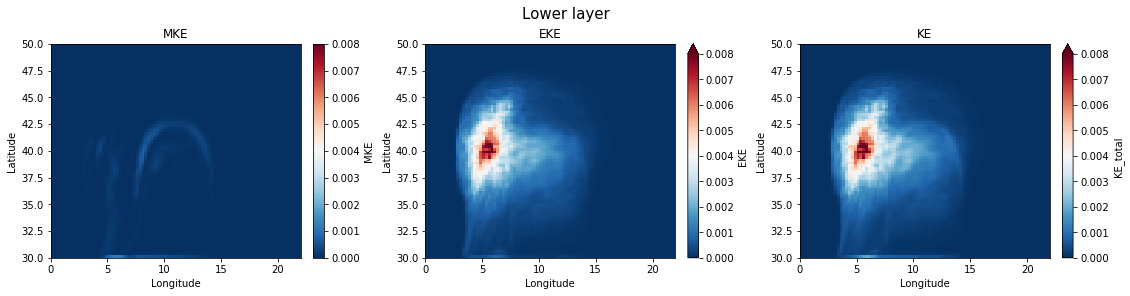

In [27]:
fig, ax = ds.get_axes(nfig=3,ncol=3, ratio=1.3)
ds['R64_R4'].MKE.isel(zl=1).plot(ax=ax[0], vmin=0, vmax=0.008, cmap='RdBu_r')
ax[0].set_title('MKE')
ds['R64_R4'].EKE.isel(zl=1).plot(ax=ax[1], vmin=0, vmax=0.008, cmap='RdBu_r')
ax[1].set_title('EKE')
ds['R64_R4'].KE_total.isel(zl=1).plot(ax=ax[2], vmin=0, vmax=0.008, cmap='RdBu_r')
ax[2].set_title('KE')
plt.suptitle('Lower layer', fontsize=15)

# Mean potential energy (MPE), Eddy potential energy (EPE), and total potential energy

Text(0.5, 0.98, 'Hires model')

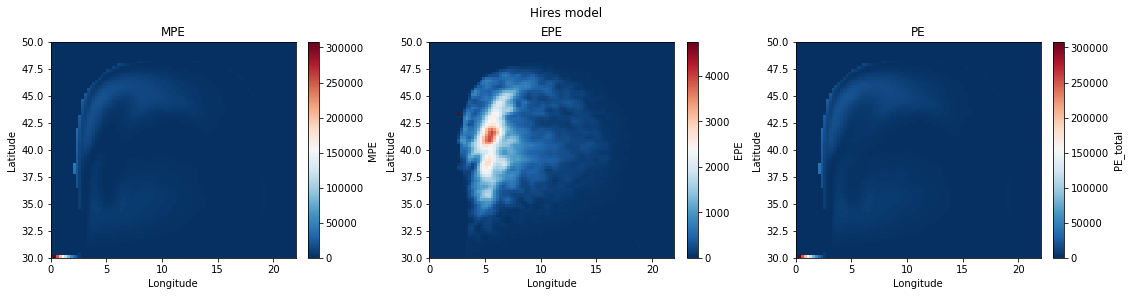

In [29]:
fig, ax = ds.get_axes(nfig=3,ncol=3, ratio=1.3)
ds['R64_R4'].MPE.plot(ax=ax[0], cmap='RdBu_r')
ax[0].set_title('MPE')
ds['R64_R4'].EPE.plot(ax=ax[1], cmap='RdBu_r')
ax[1].set_title('EPE')
ds['R64_R4'].PE_total.plot(ax=ax[2], cmap='RdBu_r')
ax[2].set_title('PE')
plt.suptitle('Hires model')

Calculating value of e_mean
Saving result to /home/pp2681/ocean-tools/cache/e_mean_R4.nc
Calculating value of h_mean
Saving result to /home/pp2681/ocean-tools/cache/h_mean_R4.nc
Reading file /home/pp2681/ocean-tools/cache/e_mean_R4.nc
Returning cached value of e_mean
Reading file /home/pp2681/ocean-tools/cache/h_mean_R4.nc
Returning cached value of h_mean
Reading file /home/pp2681/ocean-tools/cache/e_mean_R4.nc
Returning cached value of e_mean
Reading file /home/pp2681/ocean-tools/cache/h_mean_R4.nc
Returning cached value of h_mean
Reading file /home/pp2681/ocean-tools/cache/e_mean_R4.nc
Returning cached value of e_mean
Reading file /home/pp2681/ocean-tools/cache/h_mean_R4.nc
Returning cached value of h_mean


Text(0.5, 0.98, 'Lores model')

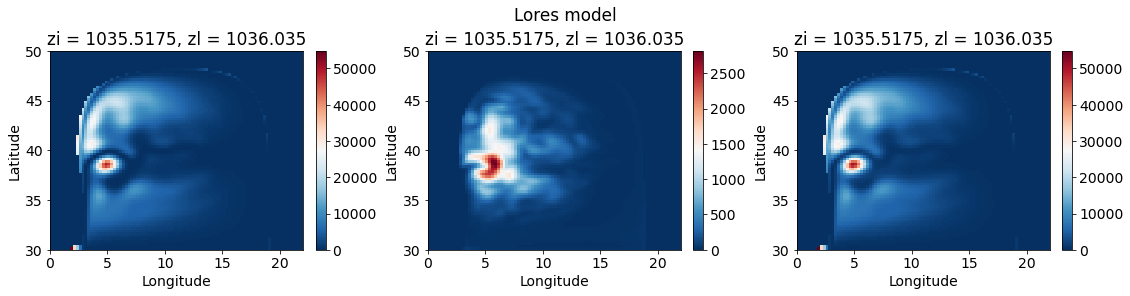

In [419]:
fig, ax = ds.get_axes(nfig=3,ncol=3, ratio=1.3)
ds['R4'].MPE.plot(ax=ax[0], cmap='RdBu_r')
ds['R4'].EPE.plot(ax=ax[1], cmap='RdBu_r')
ds['R4'].PE_total.plot(ax=ax[2], cmap='RdBu_r')
plt.suptitle('Lores model')

# Difference between old and new definition of EKE

Reading file /home/pp2681/ocean-tools/cache/EKE_R8.nc
Returning cached value of EKE
Reading file /home/pp2681/ocean-tools/cache/MKE_R8.nc
Returning cached value of MKE
0.047538117


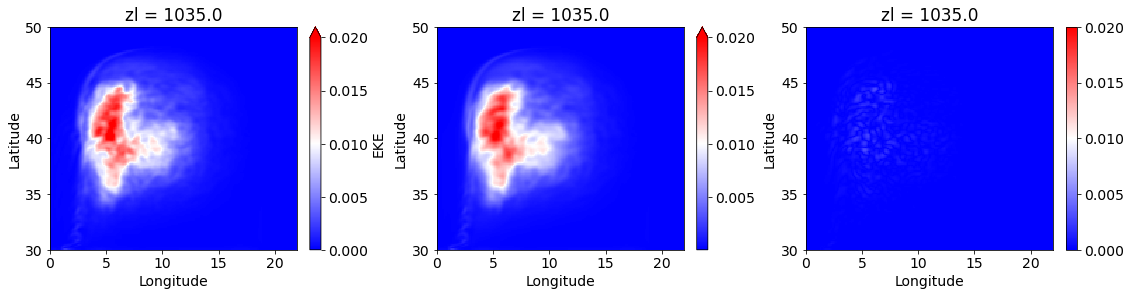

In [155]:
fig, ax = ds.get_axes(nfig=3,ncol=3, ratio=1.3)
eke1 = ds['R8'].EKE.isel(zl=0)
eke2 = ds['R8'].EKE_old.isel(zl=0)
eke1.plot(ax=ax[0], vmax=0.02, cmap='bwr')
eke2.plot(ax=ax[1], vmax=0.02, cmap='bwr')
error = np.abs(eke1-eke2)
error.plot(ax=ax[2], vmax=0.02, cmap='bwr')
print((error.mean(dim=('xh', 'yh')) / eke1.mean(dim=('xh', 'yh'))).values)

Reading file /home/pp2681/ocean-tools/cache/EKE_R4.nc
Returning cached value of EKE
Reading file /home/pp2681/ocean-tools/cache/MKE_R4.nc
Returning cached value of MKE
0.020803427


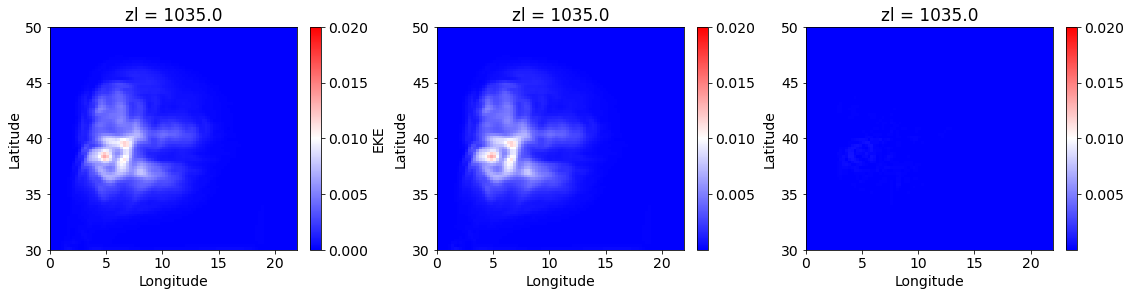

In [153]:
fig, ax = ds.get_axes(nfig=3,ncol=3, ratio=1.3)
eke1 = ds['R4'].EKE.isel(zl=0)
eke2 = ds['R4'].EKE_old.isel(zl=0)
eke1.plot(ax=ax[0], vmax=0.02, cmap='bwr')
eke2.plot(ax=ax[1], vmax=0.02, cmap='bwr')
error = np.abs(eke1-eke2)
error.plot(ax=ax[2], vmax=0.02, cmap='bwr')
print((error.mean(dim=('xh', 'yh')) / eke1.mean(dim=('xh', 'yh'))).values)

# Energy integrals

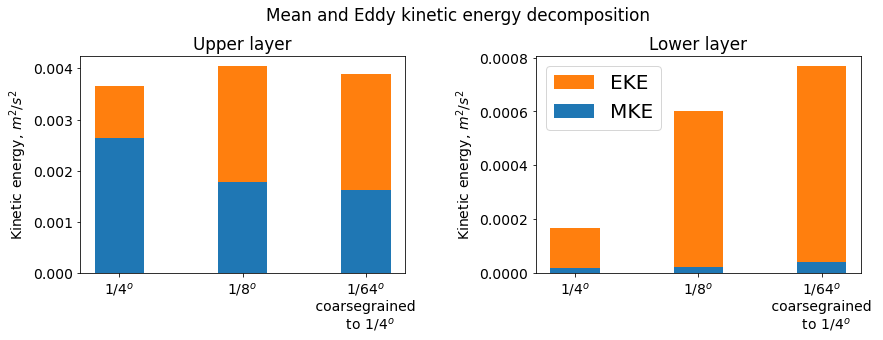

In [245]:
exps = ['R4', 'R8', 'R64_R4']
labels = ['$1/4^o$', '$1/8^o$', '$1/64^o$ \n coarsegrained \n  to $1/4^o$']

plt.figure(figsize=(14,4))
plt.subplots_adjust(wspace=0.4)
for zl in range(2):
    plt.subplot(1,2,zl+1)
    KE = []
    MKE = []
    EKE = []
    for exp in exps:
        KE.append(ds[exp].KE_total_val.isel(zl=zl).values)
        MKE.append(ds[exp].MKE_val.isel(zl=zl).values)
        EKE.append(ds[exp].EKE_val.isel(zl=zl).values)
    x=np.arange(len(exps));
#    plt.bar(x-0.2,MKE,0.4,label='MKE');
#    plt.bar(x+0.2,EKE,0.4,label='EKE');
    plt.bar(x,KE,0.4,label='EKE', color='tab:orange')
    plt.bar(x,MKE,0.4,label='MKE', color='tab:blue')
    plt.ylabel('Kinetic energy, $m^2/s^2$', fontsize=14);
    plt.xticks(ticks=x,labels=labels);
    if zl==0:
        plt.title('Upper layer')
    else:
        plt.title('Lower layer')
        plt.legend(loc='upper left', fontsize=20)
plt.suptitle('Mean and Eddy kinetic energy decomposition', y=1.05)
plt.savefig('MKE-EKE-bar.pdf', bbox_inches='tight')

# EKE_spectrum error estimation

In [223]:
sp1 = ds['R16'].EKE_spectrum
sp2 = ds['R16'].EKE_spectrum_direct
error = np.abs(sp1-sp2) / np.abs(sp1)
error.max().compute()

Reading file /home/pp2681/ocean-tools/cache/EKE_spectrum_R16.nc
Returning cached value of EKE_spectrum
Reading file /home/pp2681/ocean-tools/cache/u_mean_R16.nc
Returning cached value of u_mean
Reading file /home/pp2681/ocean-tools/cache/v_mean_R16.nc
Returning cached value of v_mean


<xarray.DataArray ()>
array(0.00897288)

# EPE, MPE

Reading file /home/pp2681/ocean-tools/cache/PE_Joul_series_R64.nc
Returning cached value of PE_Joul_series


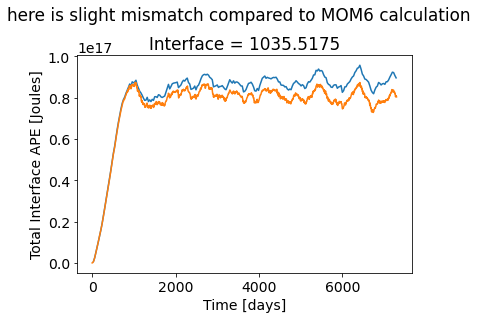

In [437]:
s1 = ds['R64'].PE_Joul_series.plot()
s2 = ds['R64'].series.APE.isel(Interface=1).plot()
plt.suptitle('here is slight mismatch compared to MOM6 calculation', y=1.05);

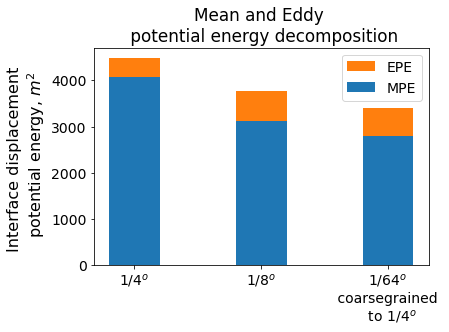

In [247]:
exps = ['R4', 'R8', 'R64_R4']
labels = ['$1/4^o$', '$1/8^o$', '$1/64^o$ \n coarsegrained \n  to $1/4^o$']

PE = []
MPE = []
EPE = []
for exp in exps:
    PE.append(ds[exp].PE_total_val.values)
    MPE.append(ds[exp].MPE_val.values)
    EPE.append(ds[exp].EPE_val.values)
x=np.arange(len(exps));
plt.bar(x,PE,0.4,label='EPE', color='tab:orange');
plt.bar(x,MPE,0.4,label='MPE');
plt.title('Mean and Eddy \n potential energy decomposition');
plt.ylabel('Interface displacement \n potential energy, $m^2$', fontsize=16);
plt.xticks(ticks=x,labels=labels);
plt.legend()
plt.savefig('MPE-EPE.pdf',bbox_inches='tight')

In [ ]:
PE = []
MPE = []
EPE = []
exps = ['R2', 'R4', 'R8', 'R16', 'R32', 'R64']
for exp in exps:
    PE.append(ds[exp].PE_total_val.values)
    MPE.append(ds[exp].MPE_val.values)
    EPE.append(ds[exp].EPE_val.values)
x=np.arange(len(exps));
plt.bar(x-0.2,MPE,0.4,label='MPE');
plt.bar(x+0.2,EPE,0.4,label='EPE');
plt.title('Reference online simulations');
plt.ylabel('Interface displacement potential energy, $m^2$', fontsize=10);
plt.xticks(ticks=x,labels=['$1/2^o$','$1/4^o$','$1/8^o$','$1/16^o$','$1/32^o$','$1/64^o$']);
plt.legend()

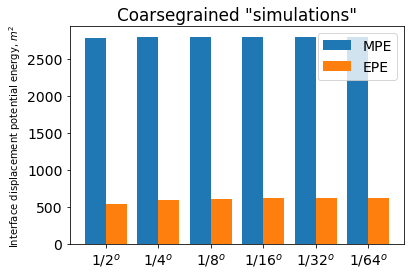

In [703]:
PE = []
MPE = []
EPE = []
exps = ['R64_R2', 'R64_R4', 'R64_R8', 'R64_R16', 'R64_R32', 'R64']
for exp in exps:
    PE.append(float(ds[exp].PE_total_val))
    MPE.append(float(ds[exp].MPE_val))
    EPE.append(float(ds[exp].EPE_val))
x=np.arange(len(exps));
plt.bar(x-0.2,MPE,0.4,label='MPE');
plt.bar(x+0.2,EPE,0.4,label='EPE');
plt.title('Coarsegrained "simulations"');
plt.ylabel('Interface displacement potential energy, $m^2$', fontsize=10);
plt.xticks(ticks=x,labels=['$1/2^o$','$1/4^o$','$1/8^o$','$1/16^o$','$1/32^o$','$1/64^o$']);
plt.legend()

# L1_error for arbitrary fields 3d, 2d, 0d

In [562]:
L1_error(ds['R4'].u_mean,ds['R64_R4'].u_mean)

Reading file /home/pp2681/ocean-tools/cache/u_mean_R4.nc
Returning cached value of u_mean
Reading file /home/pp2681/ocean-tools/cache/u_mean_R64_R4.nc
Returning cached value of u_mean


[0.86265314, 1.1647519]

In [563]:
L1_error(ds['R8'].u_mean,ds['R64_R8'].u_mean)

Reading file /home/pp2681/ocean-tools/cache/u_mean_R8.nc
Returning cached value of u_mean
Reading file /home/pp2681/ocean-tools/cache/u_mean_R64_R8.nc
Returning cached value of u_mean


[0.37753332, 0.72835225]

In [564]:
L1_error(ds['R4'].KE_spectrum,ds['R64_R4'].KE_spectrum)

Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_R4.nc
Returning cached value of KE_spectrum
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_R64_R4.nc
Returning cached value of KE_spectrum


[0.37732033639825696, 0.7555631703103017]

In [565]:
L1_error(ds['R8'].KE_spectrum,ds['R64_R8'].KE_spectrum)

Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_R8.nc
Returning cached value of KE_spectrum
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_R64_R8.nc
Returning cached value of KE_spectrum


[0.13724906419064548, 0.24863660547800545]

In [592]:
L1_error(ds['R4'].EPE,ds['R64_R4'].EPE)

Reading file /home/pp2681/ocean-tools/cache/EPE_R4.nc
Returning cached value of EPE
Reading file /home/pp2681/ocean-tools/cache/EPE_R64_R4.nc
Returning cached value of EPE


[0.51387703]

In [594]:
L1_error(ds['R8'].EPE,ds['R64_R8'].EPE)

Reading file /home/pp2681/ocean-tools/cache/EPE_R8.nc
Returning cached value of EPE
Reading file /home/pp2681/ocean-tools/cache/EPE_R64_R8.nc
Returning cached value of EPE


[0.31846467]

In [598]:
L1_error(ds['R4'].EPE_val,ds['R64_R4'].EPE_val)

Reading file /home/pp2681/ocean-tools/cache/EPE_val_R4.nc
Returning cached value of EPE_val
Reading file /home/pp2681/ocean-tools/cache/EPE_val_R64_R4.nc
Returning cached value of EPE_val


[0.35459314585850493]

In [599]:
L1_error(ds['R8'].EPE_val,ds['R64_R8'].EPE_val)

Reading file /home/pp2681/ocean-tools/cache/EPE_val_R8.nc
Returning cached value of EPE_val
Reading file /home/pp2681/ocean-tools/cache/EPE_val_R64_R8.nc
Returning cached value of EPE_val


[0.1060943548947374]

In [605]:
L1_error(ds['R4'].ssh_mean,ds['R64_R4'].ssh_mean)

Reading file /home/pp2681/ocean-tools/cache/ssh_mean_R4.nc
Returning cached value of ssh_mean
Reading file /home/pp2681/ocean-tools/cache/ssh_mean_R64_R4.nc
Returning cached value of ssh_mean


[0.31544703]

# L1 error for Experiment

In [719]:
%time l,d = ds['R2'].L1_error(ds['R64_R2'])

CPU times: user 240 ms, sys: 15.6 ms, total: 256 ms
Wall time: 254 ms


In [8]:
import time
for exp in ['R2', 'R4', 'R8', 'R16', 'R32']:
    target = 'R64_'+exp
    print(f'Target = {target}')
    time.sleep(1)
    %time ds[exp].L1_error(ds[target])

Target = R64_R2
CPU times: user 6min 10s, sys: 6min 51s, total: 13min 2s
Wall time: 2min 9s
Target = R64_R4
CPU times: user 10min 23s, sys: 17min 57s, total: 28min 21s
Wall time: 2min 56s
Target = R64_R8
CPU times: user 13min 29s, sys: 23min 7s, total: 36min 36s
Wall time: 3min 19s
Target = R64_R16
CPU times: user 23min 45s, sys: 40min 1s, total: 1h 3min 46s
Wall time: 5min 32s
Target = R64_R32
CPU times: user 49min 49s, sys: 1h 26min 29s, total: 2h 16min 18s
Wall time: 11min 46s


In [15]:
%time l,d = ds['R4'].L1_error(ds['R64_R4'])
%time l32,d32 = ds['R32'].L1_error(ds['R64_R32'])

CPU times: user 272 ms, sys: 14 ms, total: 286 ms
Wall time: 281 ms
CPU times: user 344 ms, sys: 88.4 ms, total: 432 ms
Wall time: 809 ms


In [14]:
d

{'ssh_mean': [0.31544703],
 'u_mean': [0.86265314, 1.1647519],
 'v_mean': [0.72687227, 1.0266299],
 'KE_spectrum': [0.37732033639825696, 0.7555631703103017],
 'KE_spectrum_global': [0.47242593862895876, 0.7949346633884542],
 'MKE_spectrum': [8.037990883825108, 0.47117975454864736],
 'EKE_spectrum': [0.6353402318820215, 0.8082094551988651],
 'PE_spectrum': [0.562193530953757],
 'KE_time_spectrum': [0.47725564450200186, 0.7261957323961538],
 'MKE': [1.0076354, 0.9641135],
 'EKE': [0.59340554, 0.834983],
 'KE_total': [0.5876222, 0.82148397],
 'MKE_val': [0.6269524273623021, 0.537372622128326],
 'EKE_val': [0.5543860984584303, 0.7988977385007309],
 'KE_total_val': [0.06418667300105142, 0.7850479520343928],
 'MPE': [0.58582616],
 'EPE': [0.51387703],
 'PE_total': [0.5243217],
 'MPE_val': [0.45716685],
 'EPE_val': [0.30977765],
 'PE_total_val': [0.32297015]}

In [32]:
len(d32)

21

Text(0.5, 1.0, '$1/64^o$')

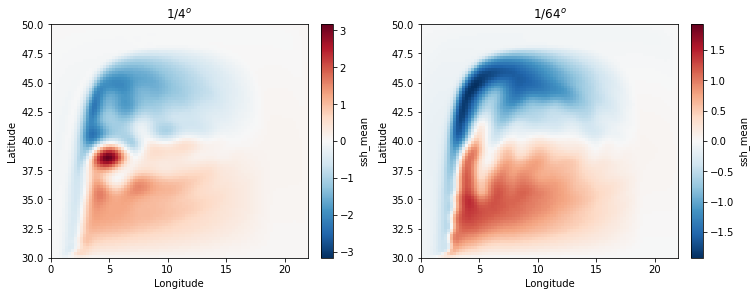

In [22]:
fig,ax = ds.get_axes(nfig=2, ncol=2, ratio=1.3)
ds['R4'].ssh_mean.plot(ax=ax[0])
ax[0].set_title('$1/4^o$')
ds['R64_R4'].ssh_mean.plot(ax=ax[1])
ax[1].set_title('$1/64^o$')

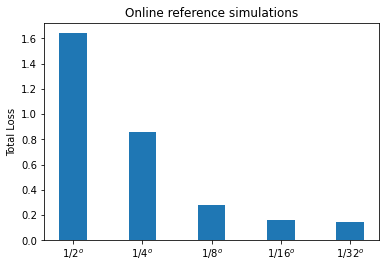

In [84]:
Loss = []
exps = ['R2', 'R4', 'R8', 'R16', 'R32']
for exp in exps:
    target = 'R64_'+exp
    l,d=ds[exp].L1_error(ds[target])
    Loss.append(np.mean(l))

x=np.arange(len(exps));
plt.bar(x,Loss,0.4);
plt.title('Online reference simulations');
plt.ylabel('Total Loss')
plt.xticks(ticks=x,labels=['$1/2^o$','$1/4^o$','$1/8^o$','$1/16^o$','$1/32^o$']);

In [88]:
1-0.1473/0.1615

0.0879256965944274

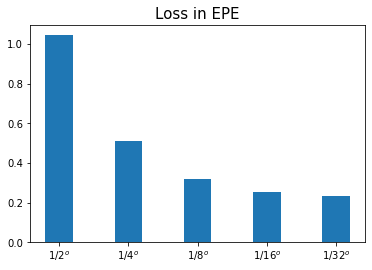

In [75]:
Loss = []
key = 'EPE'
exps = ['R2', 'R4', 'R8', 'R16', 'R32']
for exp in exps:
    target = 'R64_'+exp
    l,d=ds[exp].L1_error(ds[target])
    Loss.append(np.mean(d[key]))

x=np.arange(len(exps));
plt.bar(x,Loss,0.4);
plt.title('Loss in EPE', fontsize=15);
#plt.ylabel('Loss in scalar KE')
plt.xticks(ticks=x,labels=['$1/2^o$','$1/4^o$','$1/8^o$','$1/16^o$','$1/32^o$']);